# Feature Selection

### Ram Siripuram


# What?

“The focus of feature selection is to select a subset of variables from the input which can efficiently describe the input data”<sup>1</sup>

It is __NOT__ feature transformation eg. PCA



`1. Chandrashekar, Girish, and Ferat Sahin. "A survey on feature selection methods." Computers & Electrical Engineering 40, no. 1 (2014): 16-28.`

# Why?

* Reduce effects from noise or irrelevant variables
* Reduce dimensionality
* Reduce model complexity
* Increase performance


# How?

* Filter Methods
* Wrapper Methods
* Others


# Filter Methods

### Rank features on some criteria and select the N best features to include


* Pearson’s Correlation
    - How correlated are the features with the label?
    - Keep *N* most correlated features
* Chi-Squared Test
    - How dependent are the features with the label?
* Kruskal-Wallis H-test
    - How well does the feature discriminate the output label?
    - Keep *N* most discriminating features
* Variance Inflation Factor
    - How much colinearity exists between the features?
    - Remove feature with most colinearity (highest VIF)
    - Recalculate VIF and repeat until all VIF is below threshold (usually 5)


* Mutual Information
    - How much information is shared between the feature and the label?
    - Keep *N* most information sharing features
* Kullback–Leibler Divergence
    - How much information is not shared between the features?
    - Remove *N* most information sharing features

# [Chi-Squared Test](https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection)

In [2]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
iris = load_iris()
X, y = iris.data, iris.target
X.shape

(150, 4)

In [4]:
chi2(X, y)

(array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ]),
 array([4.47651499e-03, 1.56395980e-01, 5.53397228e-26, 2.75824965e-15]))

In [3]:
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
X_new.shape

(150, 2)

# [Variance Inflation Factor](https://stackoverflow.com/a/48819434)
### [Library Documentation](https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html)

In [7]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

irisdf = pd.DataFrame(iris.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
X = add_constant(irisdf)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

/home/ram/anaconda3/envs/tfenv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const           131.113086
sepal_length      7.072722
sepal_width       2.100872
petal_length     31.261498
petal_width      16.090175
dtype: float64

In [11]:
X = X.drop('petal_length', axis=1)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const           130.416081
sepal_length      3.415733
sepal_width       1.305515
petal_width       3.889961
dtype: float64

# Wrapper Methods
Train a classifier on random subsets of features and compare performances

Pick your classifier, pick your performance metric, and pick your __search strategy__


* Recursive Feature Elimination
* Sequential Feature Selector
* [Branch and Bound method](https://doi.org/10.1016/0031-3203(93)90054-Z)
* [Genetic Algorithm](https://www.neuraldesigner.com/blog/genetic_algorithms_for_feature_selection)
* [Particle Swarm Optimization](https://doi.org/10.1109/EUROCON.2017.8011255)


# [Recursive Feature Elimination](scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)

In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
# Load the digits dataset
digits = load_digits()
X = digits.images.reshape((len(digits.images), -1))
y = digits.target

# Create the RFE object and rank each pixel
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X, y)
ranking = rfe.ranking_.reshape(digits.images[0].shape)

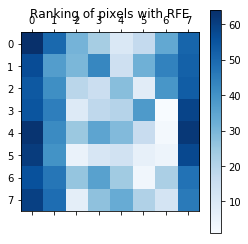

In [16]:
# Plot pixel ranking
plt.matshow(ranking, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()

# [Sequential Feature Selector](http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/)

# Others

* Clustering
* Semi-Supervised Learning
* Ensemble Learning

Further reading:
`Li, Jundong, Kewei Cheng, Suhang Wang, Fred Morstatter, Robert P. Trevino, Jiliang Tang, and Huan Liu. "Feature selection: A data perspective." ACM Computing Surveys (CSUR) 50, no. 6 (2018): 94.`
[link](https://arxiv.org/pdf/1601.07996.pdf)